# INTRODUÇÃO

Pipeline usado para estudo de caso do Iris dataset:

1] Entendimento do Problema

2] Preparação do ambiente (aquisição dos dados)

3] Data Understanding

4] Data Preparation

5] Modeling

6] Evaluation

7] Deployment

## 1. Entendimento do Problema

O problema consiste em classificar as 3 espécies de flores - Versicolor, Setosa e Virginica - de acordo com as informações sobre o comprimento e a largura da pétala e da sepala de cada flor. 

## 2. Carga dos dados

### 1.1) Instalação das bibliotecas

In [3]:
# Computação númerica
import numpy as np

# Manipulação de dados
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
import pycaret as py
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import make_scorer,mean_absolute_error, mean_squared_error, r2_score, f1_score,roc_auc_score, recall_score,  silhouette_score
from sklearn.ensemble import RandomForestClassifier


### 1.2) Leitura da base de dados

- A base conta com 150 observações e 6 variáveis associadas 
- Entre as 6 variáveis: 4 float (var.explicativas númericas), 1 object (var.resposta categórica) e 1 int (identificador). Todos corretos, não sendo necessário o tratamento dos tipos de variáveis
- Não há valores nulos, sendo não necessário o tratamento de missing values

In [18]:
# Importando a base de dados IRIS
data = pd.read_csv('iris.csv')

In [55]:
# Amostra da base
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
# Informações sobre a base
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
# Retirando a variavel de identificação Id

data.drop('Id',axis=1,inplace=True)

## 3. Data Understanding

- As quatro variáveis explicativas númericas possuem a mesma unidade de medida (Cm): Não é necessário a padronização dos dados
- A variável resposta 'Species' assume 3 valores (virginica, versicolor e setosa) sendo 50 observações para cada valor: Não é necessário balanceamento da amostra
- Analise Univariada: 
  - A especie 'setosa' possui os menor comprimento e largura da pétala, indicando que a previsão desse tipo de especie seja mais fácil
  
- Analise Bivariada:
  - As dimensões da Petala separam melhor as espécies do que as dimensões da Sepala
  - A largura da sepala é uma variavel dificil para prever a especie pois possui distribuição semelhante entre as 3 espécies
  
  - As dimensões da Petala são altamente correlacionadas entre si, podendo ocorrer problemas de multicolineariedade. 
  - As dimensões da Sepala não são correlacionadas entre si
  - O comprimento da Sepala é altamente correlacionado com o comprimento e largura da Petala
  
- Analise Multivariada:
  - Fica claro o 'cluster' da espécie setosa

In [21]:
# Descrição da base
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [33]:
# Quantidade de observações por Categoria 
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

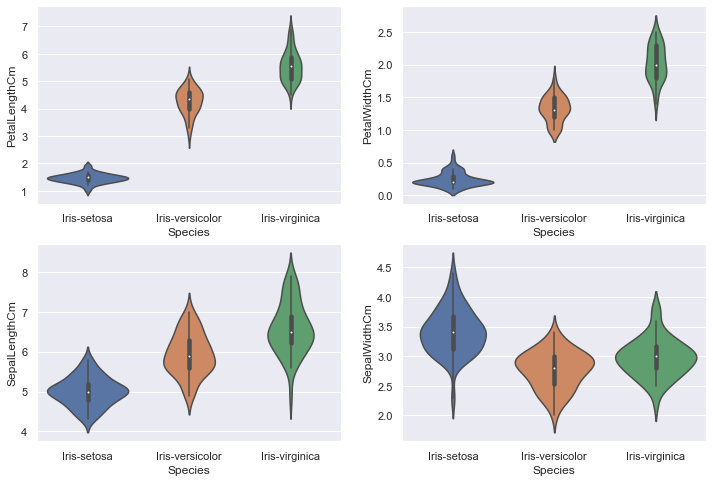

In [76]:
# Análise Univariada de cada variável explicativa

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

<Figure size 720x360 with 0 Axes>

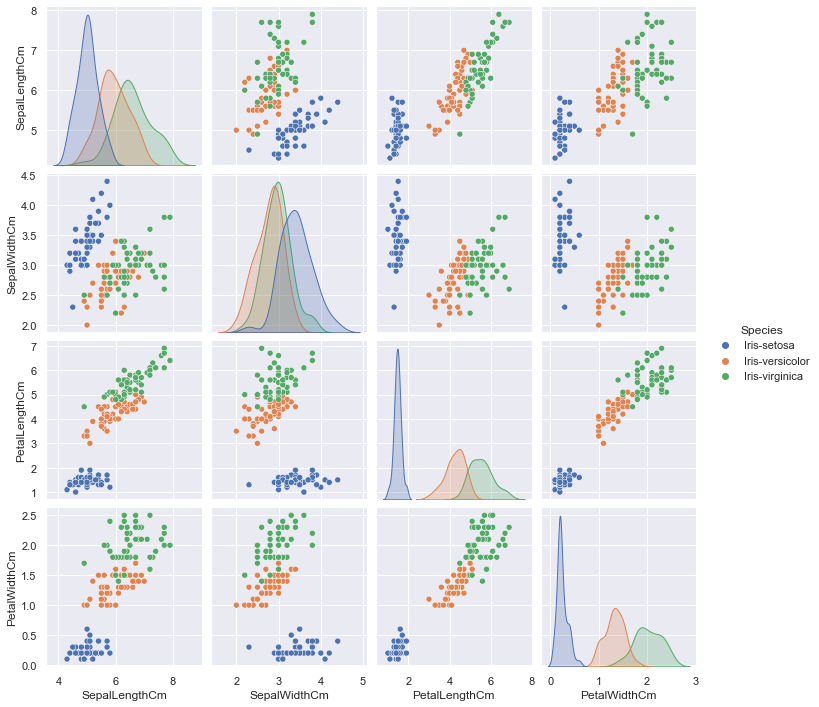

In [47]:
# Análise Bivariada: Entender a relação entre as variáveis explicativas para cada espécie

sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde")

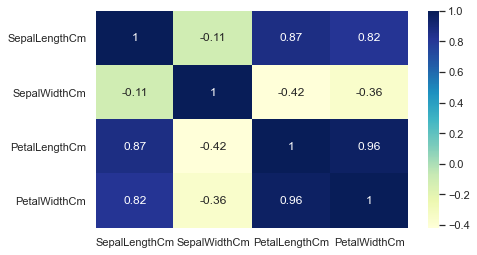

In [62]:
# Correlação entre as variaveis explicativas

plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu') 
plt.show()

<AxesSubplot:>

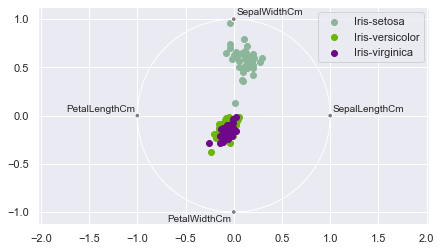

In [82]:
# Analise multivariada
plt.figure(figsize=(7,4))
radviz(data, "Species")

## 4. Data Preparation

Nesse caso, não precisamos adotar nenhuma preparação dos dados pois os dados estão em boas condições. Há casos onde devemos tratar missing values, tratar outliers, incluir novas variáveis (feature engineering)

## 5. Modeling

O problema é de classificação e irei utilizar modelos de classificação multiclasse para poder prever qual espécie pertence cada observação

### 5.1. Comparando modelos com Pycaret

In [103]:
# CONFIGURANDO OS PARAMETROS DO PYCARET

from pycaret.classification import *

reg = setup(data = data, 
            target = "Species", 
            train_size = 0.8,
            remove_multicollinearity = True,
            multicollinearity_threshold = 0.95,
            session_id = 123,                                      # Equivalente ao ‘random_state’ do scikit-learn
            silent = True,                                         # Controla a entrada de confirmação de tipos de dados
            html= False,                                           # Quando definido como False, evita a exibição do monitor em tempo de execução
            n_jobs = None)                                         # Executa todas as funções em um único processador quando n_jobs = None            

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target,Species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [104]:
# COMPARANDO OS MODELOS

compare = compare_models(fold = 5, n_select = 3, sort = 'F1') #Accuracy, AUC, Recall, Precision, F1, Kappa, MCC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9583,0.9888,0.959,0.9609,0.9582,0.9373,0.9387,0.032


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
svm,SVM - Linear Kernel,0.8167,0.0000,0.8275,0.8578,0.7852,0.7275,0.7553,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
ridge,Ridge Classifier,0.8417,0.0000,0.8516,0.8639,0.8380,0.7621,0.7767,0.012
svm,SVM - Linear Kernel,0.8167,0.0000,0.8275,0.8578,0.7852,0.7275,0.7553,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164
ridge,Ridge Classifier,0.8417,0.0000,0.8516,0.8639,0.8380,0.7621,0.7767,0.012
svm,SVM - Linear Kernel,0.8167,0.0000,0.8275,0.8578,0.7852,0.7275,0.7553,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164
ridge,Ridge Classifier,0.8417,0.0000,0.8516,0.8639,0.8380,0.7621,0.7767,0.012
svm,SVM - Linear Kernel,0.8167,0.0000,0.8275,0.8578,0.7852,0.7275,0.7553,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164
ridge,Ridge Classifier,0.8417,0.0000,0.8516,0.8639,0.8380,0.7621,0.7767,0.012
ada,Ada Boost Classifier,0.8333,0.9718,0.8337,0.8745,0.8155,0.7462,0.7753,0.096
svm,SVM - Linear Kernel,0.8167,0.0000,0.8275,0.8578,0.7852,0.7275,0.7553,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
gbc,Gradient Boosting Classifier,0.9417,0.9795,0.9444,0.9445,0.9416,0.9121,0.9136,0.198
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164
ridge,Ridge Classifier,0.8417,0.0000,0.8516,0.8639,0.8380,0.7621,0.7767,0.012
ada,Ada Boost Classifier,0.8333,0.9718,0.8337,0.8745,0.8155,0.7462,0.7753,0.096
svm,SVM - Linear Kernel,0.8167,0.0000,0.8275,0.8578,0.7852,0.7275,0.7553,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
gbc,Gradient Boosting Classifier,0.9417,0.9795,0.9444,0.9445,0.9416,0.9121,0.9136,0.198
lda,Linear Discriminant Analysis,0.9417,0.9936,0.9433,0.9425,0.9416,0.9120,0.9125,0.016
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164
ridge,Ridge Classifier,0.8417,0.0000,0.8516,0.8639,0.8380,0.7621,0.7767,0.012
ada,Ada Boost Classifier,0.8333,0.9718,0.8337,0.8745,0.8155,0.7462,0.7753,0.096


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
gbc,Gradient Boosting Classifier,0.9417,0.9795,0.9444,0.9445,0.9416,0.9121,0.9136,0.198
lda,Linear Discriminant Analysis,0.9417,0.9936,0.9433,0.9425,0.9416,0.9120,0.9125,0.016
et,Extra Trees Classifier,0.9333,0.9796,0.9358,0.9369,0.9333,0.8998,0.9016,0.142
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164
ridge,Ridge Classifier,0.8417,0.0000,0.8516,0.8639,0.8380,0.7621,0.7767,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
gbc,Gradient Boosting Classifier,0.9417,0.9795,0.9444,0.9445,0.9416,0.9121,0.9136,0.198
lda,Linear Discriminant Analysis,0.9417,0.9936,0.9433,0.9425,0.9416,0.9120,0.9125,0.016
et,Extra Trees Classifier,0.9333,0.9796,0.9358,0.9369,0.9333,0.8998,0.9016,0.142
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
xgboost,Extreme Gradient Boosting,0.9333,0.9725,0.9370,0.9388,0.9332,0.8998,0.9026,0.192
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
gbc,Gradient Boosting Classifier,0.9417,0.9795,0.9444,0.9445,0.9416,0.9121,0.9136,0.198
lda,Linear Discriminant Analysis,0.9417,0.9936,0.9433,0.9425,0.9416,0.9120,0.9125,0.016
et,Extra Trees Classifier,0.9333,0.9796,0.9358,0.9369,0.9333,0.8998,0.9016,0.142
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
xgboost,Extreme Gradient Boosting,0.9333,0.9725,0.9370,0.9388,0.9332,0.8998,0.9026,0.192
rf,Random Forest Classifier,0.9250,0.9813,0.9275,0.9259,0.9250,0.8870,0.8875,0.164


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
gbc,Gradient Boosting Classifier,0.9417,0.9795,0.9444,0.9445,0.9416,0.9121,0.9136,0.198
lda,Linear Discriminant Analysis,0.9417,0.9936,0.9433,0.9425,0.9416,0.9120,0.9125,0.016
catboost,CatBoost Classifier,0.9333,0.9888,0.9349,0.9383,0.9336,0.8994,0.9018,1.082
et,Extra Trees Classifier,0.9333,0.9796,0.9358,0.9369,0.9333,0.8998,0.9016,0.142
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
xgboost,Extreme Gradient Boosting,0.9333,0.9725,0.9370,0.9388,0.9332,0.8998,0.9026,0.192


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9583,0.9915,0.9620,0.9628,0.9583,0.9375,0.9398,0.012
lr,Logistic Regression,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387,0.032
nb,Naive Bayes,0.9500,0.9893,0.9516,0.9535,0.9499,0.9247,0.9266,0.016
knn,K Neighbors Classifier,0.9417,0.9824,0.9423,0.9461,0.9416,0.9122,0.9146,0.014
gbc,Gradient Boosting Classifier,0.9417,0.9795,0.9444,0.9445,0.9416,0.9121,0.9136,0.198
lda,Linear Discriminant Analysis,0.9417,0.9936,0.9433,0.9425,0.9416,0.9120,0.9125,0.016
catboost,CatBoost Classifier,0.9333,0.9888,0.9349,0.9383,0.9336,0.8994,0.9018,1.082
et,Extra Trees Classifier,0.9333,0.9796,0.9358,0.9369,0.9333,0.8998,0.9016,0.142
dt,Decision Tree Classifier,0.9333,0.9487,0.9349,0.9351,0.9332,0.8995,0.9005,0.028
xgboost,Extreme Gradient Boosting,0.9333,0.9725,0.9370,0.9388,0.9332,0.8998,0.9026,0.192


In [105]:
# TREINANDO O MODELO DE MELHOR PERFORMANCE

lr_model = create_model(estimator = 'lr', fold = 5,  round = 4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9583,0.9948,0.9583,0.9630,0.9582,0.9375,0.9400
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8750,0.9623,0.8843,0.8791,0.8750,0.8120,0.8141
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9583,0.9871,0.9524,0.9625,0.9578,0.9368,0.9393
Mean,0.9583,0.9888,0.9590,0.9609,0.9582,0.9373,0.9387
SD,0.0456,0.0141,0.0424,0.0442,0.0456,0.0686,0.0679


## 6. Evaluation

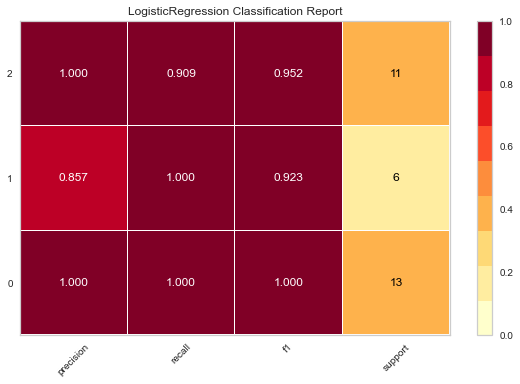

In [98]:
plot_model(lr_model, plot='class_report')

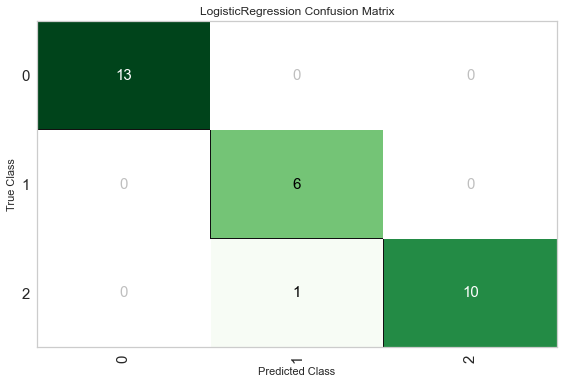

In [95]:
plot_model(lr_model, plot='confusion_matrix')

#Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2

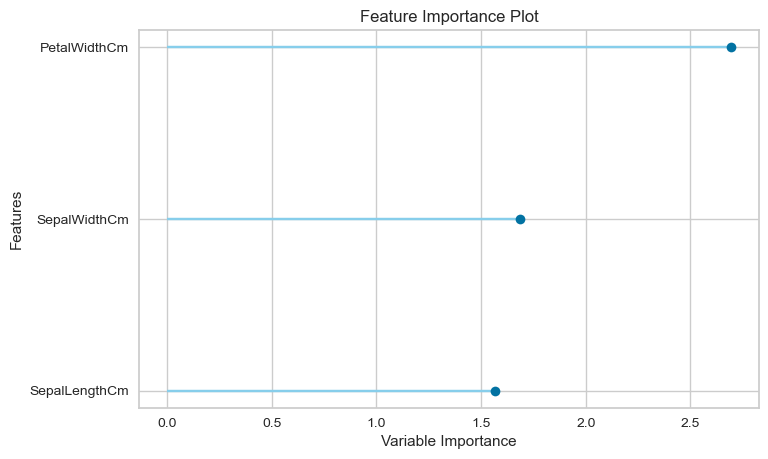

In [106]:
plot_model(lr_model, plot='feature')

## 7. Deploy

In [114]:
# finalize a model
final_lr = finalize_model(lr_model)

In [115]:
# save transformation pipeline and model 
save_model(final_lr, model_name = 'model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                        target_variable='Species',
                                        threshold=0.95)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class